In [4]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.signal import periodogram
from math import ceil

In [5]:
# msg = np.random.randint(low=0, high=2, size=int(1e6))
msg = np.random.randint(low=0, high=2, size=int(1e6))
# BPSK parameters
Eb = 0.001
fs = 10000
Tb = 0.001
br=1/Tb;                 # bit rate                 #carrier frequency for information as 1
fc1=br;                 #carrier frequency for information as 1
fc2=ceil(fc1 + br)
fc3=ceil(fc1+2*br)
fc4=ceil(fc1+3*br)

In [6]:
# Serial to parallel with k=2 (QPSK)
symbols = np.array([msg[0::2], msg[1::2]])

In [7]:
t = np.linspace(0, Tb, int(Tb*fs),endpoint=False)
s1 = np.sqrt(2/Tb)*np.cos(2*np.pi*fc1*t)
s2=np.sqrt(2/Tb)*np.cos(2*np.pi*fc2*t)
s3=np.sqrt(2/Tb)*np.cos(2*np.pi*fc3*t)
s4=np.sqrt(2/Tb)*np.cos(2*np.pi*fc4*t)
orthocheck=s1.dot(s2.dot(s3.dot(s4)))

In [8]:
orthocheck

0.0

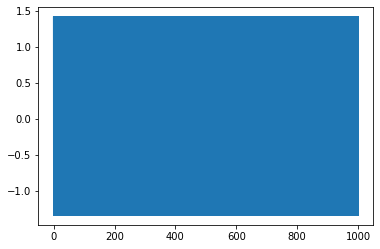

In [9]:
signal = []
t = np.linspace(0, Tb, int(Tb*fs))
for k in range(np.size(symbols, axis=1)):
    b_0 = symbols[0,k]
    b_1 = symbols[1,k]
    if b_0 == 0 and b_1 == 0:
        s=np.sqrt(2*Eb/Tb)*np.cos(2*np.pi*fc1*t)
    elif b_0 == 1 and b_1 == 0:
        s=np.sqrt(2*Eb/Tb)*np.cos(2*np.pi*fc2*t)
    elif b_0 == 0 and b_1 == 1:
        s=np.sqrt(2*Eb/Tb)*np.cos(2*np.pi*fc3*t)
    elif b_0 == 1 and b_1 == 1:
        s=np.sqrt(2*Eb/Tb)*np.cos(2*np.pi*fc4*t)
    
    signal.extend(s)
t = np.linspace(0, len(msg)*Tb, int(len(msg)*Tb*fs/2))

fig, ax = plt.subplots()
ax.plot(t, signal)

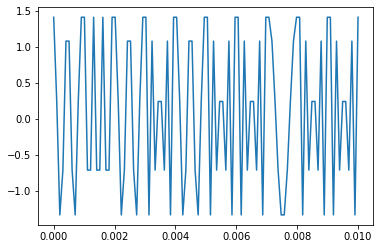

In [10]:
tplt = np.linspace(0, 10*Tb, int(10*Tb*fs))
plt.plot(tplt,signal[:len(tplt)])

0.0003999662855137848


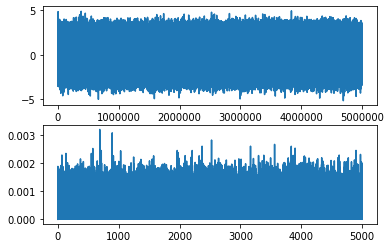

In [11]:
ns = len(signal)
noise = np.random.normal(size=ns)

f, psd = periodogram(noise, fs)

fig, ax = plt.subplots(2,1)
ax[0].plot(noise)
ax[1].plot(f, psd)

psd_av = np.mean(psd)
N0 = 2*psd_av
signalwnoise= signal+noise
print(N0)

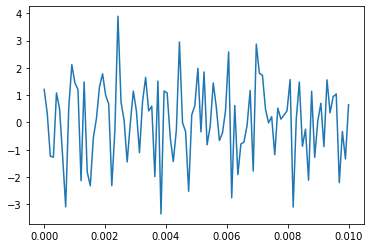

In [12]:
tplt2 = np.linspace(0, 10*Tb, int(10*Tb*fs))
plt.plot(tplt,signalwnoise[:len(tplt2)])

In [13]:
# Non coherent qfsk detector
t = np.linspace(0, Tb, int(Tb*fs))
Ts=int(Tb*fs) # no of samples of carrier for 1 bit
e1=np.cos(2*np.pi*fc1*t) #cosomega1t
e2=np.sin(2*np.pi*fc1*t) #sinomega1t
e3=np.cos(2*np.pi*fc2*t) #cosomega2t
e4=np.sin(2*np.pi*fc2*t) #sinomega2t
e5=np.cos(2*np.pi*fc3*t) #cosomega1t
e6=np.sin(2*np.pi*fc3*t) #sinomega1t
e7=np.cos(2*np.pi*fc4*t) #cosomega2t
e8=np.sin(2*np.pi*fc4*t) #sinomega2t

decmsg=[]
for x in range(int(len(signalwnoise)/Ts)):
    samplearr=signalwnoise[x*Ts:(x+1)*Ts]
    e9=(samplearr*e1).sum()/len(samplearr)
    e10=(samplearr*e2).sum()/len(samplearr)
    e11=(samplearr*e3).sum()/len(samplearr)
    e12=(samplearr*e4).sum()/len(samplearr)
    e13=(samplearr*e5).sum()/len(samplearr)
    e14=(samplearr*e6).sum()/len(samplearr)
    e15=(samplearr*e7).sum()/len(samplearr)
    e16=(samplearr*e8).sum()/len(samplearr)

    
    e17=e9+e10
    e18=e11+e12
    e19=e13+e14
    e20=e15+e16
    
    if e17>e18 and e17>e19 and e17>e20:
        decmsg.append(0)
        decmsg.append(0)
    elif e18>e17 and e18>e19 and e18>e20:
        decmsg.append(1)
        decmsg.append(0)
    elif e19>e18 and e19>e17 and e19>e20:
        decmsg.append(0)
        decmsg.append(1)
    elif e20>e17 and e20>e18 and e20>e19:
        decmsg.append(1)
        decmsg.append(1)

In [14]:
msg.shape,np.array(decmsg).shape

((1000000,), (1000000,))

In [15]:
Pe=(3/2)*np.exp(-Eb/(N0))
Pb=2*Pe/3
Pb_pr = np.count_nonzero(msg != decmsg) / len(msg)
Pe,Pb,Pb_pr

(0.12310155360555734, 0.0820677024037049, 0.101685)

In [16]:
msg[:16],np.array(decmsg[:16])

(array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0]),
 array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0]))

In [21]:
# Non coherent qfsk detector W Filter

from filter1 import butter_lowpass_filter
filteredsig=butter_lowpass_filter(signalwnoise,fs/2.1,fs,order=3)

t = np.linspace(0, Tb, int(Tb*fs))
Ts=int(Tb*fs) # no of samples of carrier for 1 bit
e1=np.cos(2*np.pi*fc1*t) #cosomega1t
e2=np.sin(2*np.pi*fc1*t) #sinomega1t
e3=np.cos(2*np.pi*fc2*t) #cosomega2t
e4=np.sin(2*np.pi*fc2*t) #sinomega2t
e5=np.cos(2*np.pi*fc3*t) #cosomega1t
e6=np.sin(2*np.pi*fc3*t) #sinomega1t
e7=np.cos(2*np.pi*fc4*t) #cosomega2t
e8=np.sin(2*np.pi*fc4*t) #sinomega2t

decmsg=[]
for x in range(int(len(filteredsig)/Ts)):
    samplearr=filteredsig[x*Ts:(x+1)*Ts]
    e9=(samplearr*e1).sum()/len(samplearr)
    e10=(samplearr*e2).sum()/len(samplearr)
    e11=(samplearr*e3).sum()/len(samplearr)
    e12=(samplearr*e4).sum()/len(samplearr)
    e13=(samplearr*e5).sum()/len(samplearr)
    e14=(samplearr*e6).sum()/len(samplearr)
    e15=(samplearr*e7).sum()/len(samplearr)
    e16=(samplearr*e8).sum()/len(samplearr)

    
    e17=e9+e10
    e18=e11+e12
    e19=e13+e14
    e20=e15+e16
    
    if e17>e18 and e17>e19 and e17>e20:
        decmsg.append(0)
        decmsg.append(0)
    elif e18>e17 and e18>e19 and e18>e20:
        decmsg.append(1)
        decmsg.append(0)
    elif e19>e18 and e19>e17 and e19>e20:
        decmsg.append(0)
        decmsg.append(1)
    elif e20>e17 and e20>e18 and e20>e19:
        decmsg.append(1)
        decmsg.append(1)

In [22]:
Pe=(3/2)*np.exp(-Eb/(N0))
Pb=2*Pe/3
Pb_pr = np.count_nonzero(msg != decmsg) / len(msg)
Pe,Pb,Pb_pr

(0.12310155360555734, 0.0820677024037049, 0.062498)